A Brain Tumor Recognition model using VGG16, running on this dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

The model can distinguish between meningioma, and pituitary tumor, or no tumor at all.

I have uploaded the model itself in the main branch.

The model was trained on Google Colab.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from PIL import Image, ImageOps

Loading the data, and pre-processing it using ImageDataGenerator

In [5]:
# Define the ImageDataGenerator object
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=10,  # Random rotation between 0 and 10 degrees
    horizontal_flip=True,  # Random horizontal flipping
    vertical_flip=False,  # No vertical flipping
)

# Load the data using flow_from_directory method
train = datagen.flow_from_directory(
    '/Training',
    target_size=(208, 242),
    batch_size=1,
    class_mode='categorical',  # Categorical labels
    color_mode='rgb'
)

eval= datagen.flow_from_directory(
    '/Testing',
    target_size=(208, 242),
    batch_size=1,
    class_mode='categorical',  # Categorical labels
    color_mode='rgb'
)

class_names = list(train.class_indices.keys())

Found 2044 images belonging to 3 classes.
Found 294 images belonging to 3 classes.


In [3]:
print(class_names)

['meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
#To verify all files:
for filename in train.filenames:
    try:
        img = Image.open(os.path.join(train.directory, filename))
    except:
        print(f"Unable to load image: {filename}")

Plotting a histogram to show data distribution:

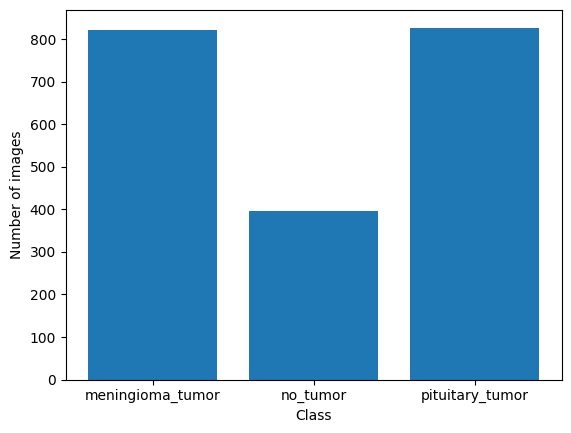

In [6]:
labels = train.classes

hist, bins = np.histogram(labels, bins=len(class_names))

plt.bar(class_names, hist)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()

Displaying an image:

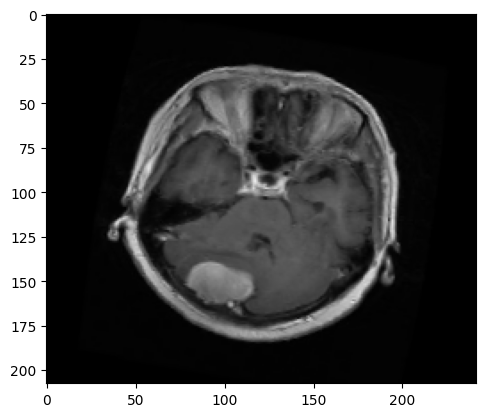

In [ ]:
images, labels = next(train)

# Plot an image from the batch
plt.imshow(images[0])
plt.show()

The Model:

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(208, 242, 3))

# Freeze the layers in the VGG16 model
for layer in vgg16_model.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train, validation_data=eval, epochs=5)

Epoch 1/5
2044/2044 [==============================] - 879s 425ms/step - loss: 0.6842 - accuracy: 0.7950 - val_loss: 0.5815 - val_accuracy: 0.7415
Epoch 2/5
2044/2044 [==============================] - 53s 26ms/step - loss: 0.3188 - accuracy: 0.8748 - val_loss: 0.7230 - val_accuracy: 0.7857
Epoch 3/5
2044/2044 [==============================] - 52s 25ms/step - loss: 0.2415 - accuracy: 0.9066 - val_loss: 0.3789 - val_accuracy: 0.8571
Epoch 4/5
2044/2044 [==============================] - 52s 25ms/step - loss: 0.2155 - accuracy: 0.9222 - val_loss: 0.4485 - val_accuracy: 0.8401
Epoch 5/5
2044/2044 [==============================] - 56s 27ms/step - loss: 0.1570 - accuracy: 0.9354 - val_loss: 0.2953 - val_accuracy: 0.9014


Best accuracy on evaluation: 0.90

In [ ]:
result= model.evaluate(eval)
print(result)

294/294 [==============================] - 8s 26ms/step - loss: 0.2832 - accuracy: 0.9048
[0.28322798013687134, 0.9047619104385376]


Testing the model with random images from evaluation/validation dataset:

1/1 [==============================] - 0s 23ms/step
Actual class:  meningioma_tumor
Predicted class: 
meningioma_tumor: 92.64%
no_tumor: 7.35%
pituitary_tumor: 0.00%


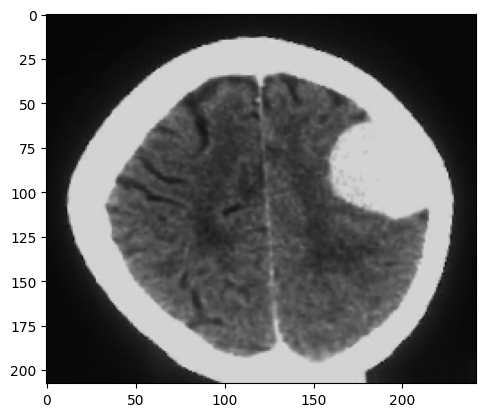

In [ ]:
import random

random_number = random.randint(0, 293)

image, label = eval[random_number]
prediction = model.predict(image)
predicted_class = class_names[np.argmax(prediction)]
max_value = prediction[0][np.argmax(prediction)]
actual_class = class_names[np.argmax(label)]
print('Actual class: ', actual_class)

top_k = 3
prediction = prediction[0] # Extract the prediction array
max_k_indices = np.argpartition(prediction, -top_k)[-top_k:]

max_k_indices = np.argsort(prediction)[::-1][:top_k]

# Print the top k class names and prediction values
print('Predicted class: ')
for i in max_k_indices:
    class_name = class_names[i]
    pred_value = prediction[i] * 100
    print(f"{class_name}: {pred_value:.2f}%")

image = np.reshape(image, (208, 242, 3))
plt.imshow(image)
plt.show()